/home/diego/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


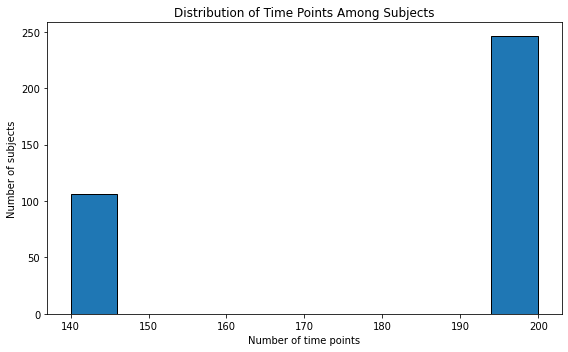

In [1]:
import os
import pandas as pd
import torch
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from tqdm import tqdm
import logging

# --- Project configuration ---
project_dir = '/home/diego/Escritorio/santiago/1st_paper/116ROIs'
os.chdir(project_dir)

# Load CSV file
csv_path = os.path.join(project_dir, 'DataBaseSubjects.csv')
subjects_df = pd.read_csv(csv_path)

# Directory for the .mat files
roi_signals_dir = os.path.join(project_dir, 'ROISignals')

# Collect time-points for each subject
time_points_list = []

# Loop through each subject in the CSV
with tqdm(total=len(subjects_df), desc="Collecting time points") as pbar:
    for _, row in subjects_df.iterrows():
        subject_id = row['SubjectID']
        mat_file_name = f"ROISignals_{subject_id}.mat"
        mat_file_path = os.path.join(roi_signals_dir, mat_file_name)
        
        if os.path.exists(mat_file_path):
            # Load the .mat file
            mat_data = sio.loadmat(mat_file_path)
            # The signals should have shape: (time_points, 116)
            signals = mat_data['ROISignals']
            
            # Number of time points is the first dimension
            n_time_points = signals.shape[0]
            time_points_list.append(n_time_points)
        pbar.update(1)

# Now 'time_points_list' holds the number of time points for each subject.
# Plot a histogram of the distribution
plt.figure(figsize=(8, 5))
plt.hist(time_points_list, bins='auto', edgecolor='black')
plt.xlabel('Number of time points')
plt.ylabel('Number of subjects')
plt.title('Distribution of Time Points Among Subjects')
plt.tight_layout()
plt.show()


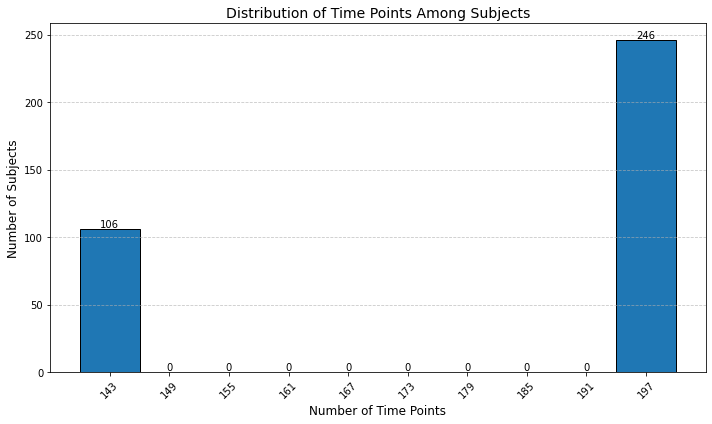

In [3]:
# Calculate histogram values explicitly
counts, bins = np.histogram(time_points_list, bins='auto')

# Determine bin midpoints for labeling
bin_midpoints = (bins[:-1] + bins[1:]) / 2

# Create plot
plt.figure(figsize=(10, 6))
bars = plt.bar(bin_midpoints, counts, width=np.diff(bins), edgecolor='black', align='center')

# Set exact x-ticks at bin midpoints (rounded to integers for clarity)
plt.xticks(bin_midpoints, [f"{int(mid)}" for mid in bin_midpoints], rotation=45)

# Set y-ticks explicitly for clarity
#plt.yticks(range(0, max(counts)+1))

# Annotate each bar with exact count
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{count}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Number of Time Points', fontsize=12)
plt.ylabel('Number of Subjects', fontsize=12)
plt.title('Distribution of Time Points Among Subjects', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



#  Main Execution

In [2]:
# prompt: import drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
